<a href="https://colab.research.google.com/github/Eiver19/Estadistica-1-y-2/blob/main/Regresiontrabajo1Eiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [38]:
import io
import pandas as pd
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')


<ipython-input-38-c6dce21a1357>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')


In [39]:
bites = io.BytesIO(uploaded['SB11_20231.TXT'])
datos_icfes = pd.read_csv(bites, sep = "¬", index_col=0, encoding="latin-1")
datos_icfes.head(4)

<ipython-input-39-65d67d87b8a4>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(bites, sep = "¬", index_col=0, encoding="latin-1")


,ESTU_NACIONALIDADÂ,ESTU_GENEROÂ,ESTU_FECHANACIMIENTOÂ,PERIODOÂ,ESTU_CONSECUTIVOÂ,ESTU_ESTUDIANTEÂ,ESTU_PAIS_RESIDEÂ,ESTU_DEPTO_RESIDEÂ,ESTU_COD_RESIDE_DEPTOÂ,ESTU_MCPIO_RESIDEÂ,...,PUNT_INGLESÂ,PERCENTIL_INGLESÂ,DESEMP_INGLESÂ,PUNT_GLOBALÂ,PERCENTIL_GLOBALÂ,ESTU_INSE_INDIVIDUALÂ,ESTU_NSE_INDIVIDUALÂ,ESTU_NSE_ESTABLECIMIENTOÂ,PERCENTIL_ESPECIAL_GLOBALÂ,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTOÂ,,,,,,,,,,,,,,,,,,,,,
TIÂ,COLOMBIAÂ,FÂ,04/11/2005Â,20231Â,SB11202310019049Â,ESTUDIANTEÂ,COLOMBIAÂ,CUNDINAMARCAÂ,25Â,CHÃAÂ,...,87Â,94Â,B+Â,422Â,100Â,67.5328144920732Â,4Â,4Â,100Â,PUBLICAR
TIÂ,COLOMBIAÂ,MÂ,08/04/2007Â,20231Â,SB11202310017318Â,ESTUDIANTEÂ,COLOMBIAÂ,VALLEÂ,76Â,CALIÂ,...,Â,Â,Â,326Â,Â,47.2239721156478Â,2Â,3Â,100Â,PUBLICAR
TIÂ,COLOMBIAÂ,FÂ,26/05/2006Â,20231Â,SB11202310030916Â,ESTUDIANTEÂ,COLOMBIAÂ,VALLEÂ,76Â,YOTOCOÂ,...,Â,Â,Â,186Â,Â,67.6955192709169Â,4Â,3Â,40Â,PUBLICAR
CCÂ,COLOMBIAÂ,FÂ,24/05/2004Â,20231Â,SB11202310074169Â,ESTUDIANTEÂ,COLOMBIAÂ,VALLEÂ,76Â,CALIÂ,...,58Â,43Â,A2Â,200Â,12Â,41.8631630741561Â,2Â,3Â,58Â,PUBLICAR


In [13]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]

In [21]:
icfes_sin_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11853 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             11853 non-null  object 
 1   ESTU_NACIONALIDAD              11853 non-null  object 
 2   ESTU_GENERO                    11853 non-null  object 
 3   ESTU_FECHANACIMIENTO           11853 non-null  object 
 4   PERIODO                        11853 non-null  int64  
 5   ESTU_CONSECUTIVO               11853 non-null  object 
 6   ESTU_ESTUDIANTE                11853 non-null  object 
 7   ESTU_PAIS_RESIDE               11853 non-null  object 
 8   ESTU_DEPTO_RESIDE              11853 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          11853 non-null  int64  
 10  ESTU_MCPIO_RESIDE              11853 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          11853 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        11851 non-null  obje

In [22]:
icfes_sin_nan.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

In [23]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0


from matplotlib import pyplot as plt
_df_0['ESTU_INSE_INDIVIDUAL'].plot(kind='hist', bins=20, title='ESTU_INSE_INDIVIDUAL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PUNT_LECTURA_CRITICA'].plot(kind='hist', bins=20, title='PUNT_LECTURA_CRITICA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PUNT_MATEMATICAS'].plot(kind='hist', bins=20, title='PUNT_MATEMATICAS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PUNT_C_NATURALES'].plot(kind='hist', bins=20, title='PUNT_C_NATURALES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ESTU_INSE_INDIVIDUAL', y='PUNT_LECTURA_CRITICA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PUNT_LECTURA_CRITICA', y='PUNT_MATEMATICAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PUNT_MATEMATICAS', y='PUNT_C_NATURALES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PUNT_C_NATURALES', y='PUNT_SOCIALES_CIUDADANAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['ESTU_INSE_INDIVIDUAL'].plot(kind='line', figsize=(8, 4), title='ESTU_INSE_INDIVIDUAL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PUNT_LECTURA_CRITICA'].plot(kind='line', figsize=(8, 4), title='PUNT_LECTURA_CRITICA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PUNT_MATEMATICAS'].plot(kind='line', figsize=(8, 4), title='PUNT_MATEMATICAS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PUNT_C_NATURALES'].plot(kind='line', figsize=(8, 4), title='PUNT_C_NATURALES')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

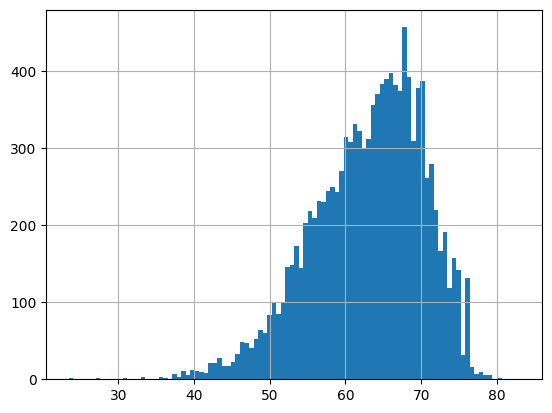

In [24]:
tabla_regresion['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

<Axes: >

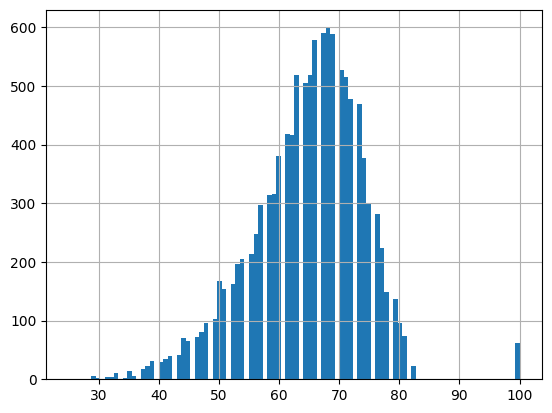

In [25]:
tabla_regresion['PUNT_LECTURA_CRITICA'].hist(bins = 100)

<Axes: >

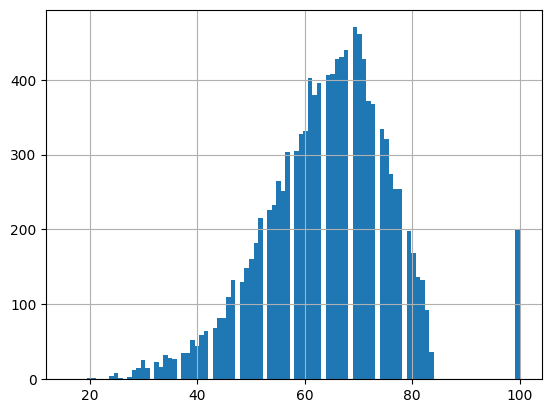

In [26]:
tabla_regresion['PUNT_MATEMATICAS'].hist(bins = 100)

<Axes: >

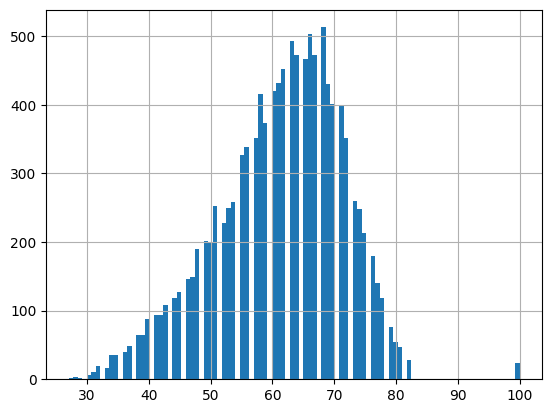

In [27]:
tabla_regresion['PUNT_C_NATURALES'].hist(bins = 100)

<Axes: >

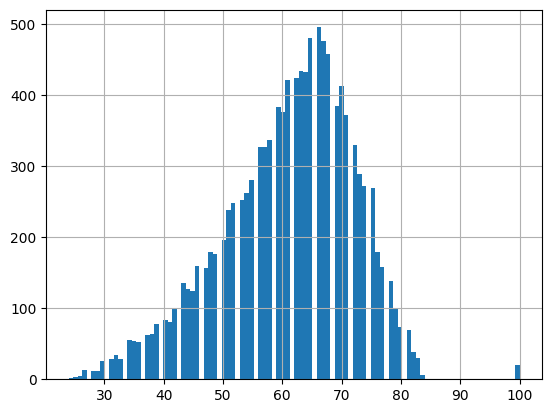

In [28]:
tabla_regresion['PUNT_SOCIALES_CIUDADANAS'].hist(bins = 100)

<Axes: >

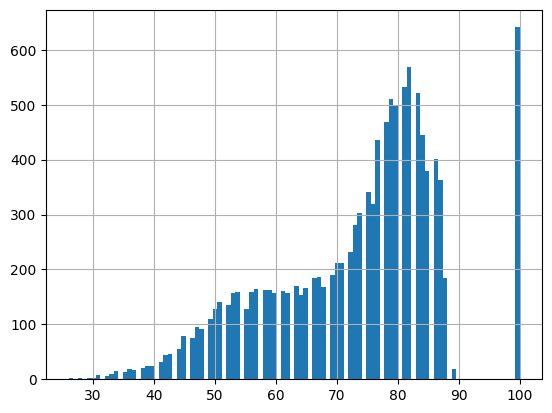

In [29]:
tabla_regresion['PUNT_INGLES'].hist(bins = 100)

In [30]:
tabla_regresion1 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL'] < 120) & (tabla_regresion['PUNT_LECTURA_CRITICA'] < 120) &  (tabla_regresion['PUNT_MATEMATICAS'] < 120) &
                                   (tabla_regresion['PUNT_C_NATURALES'] < 120) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS'] < 120) & (tabla_regresion['PUNT_INGLES'] < 120)]
tabla_regresion1.head(5)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [34]:
x = np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1,1)
y = tabla_regresion1['PUNT_LECTURA_CRITICA']
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

In [35]:
x0 = np.array(tabla_regresion1['ESTU_INSE_INDIVIDUAL']).reshape(-1,1)
y0 = tabla_regresion1['PUNT_LECTURA_CRITICA']
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(x0, y0)
pred_lineal01 = regresion01.predict(x0)

In [36]:
import matplotlib.pyplot as plt

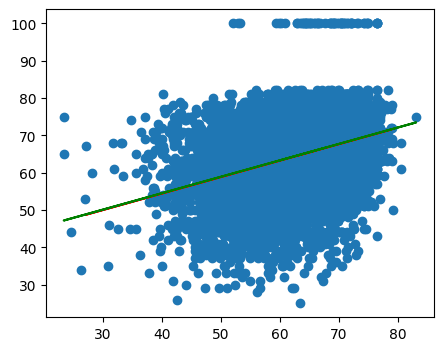

In [40]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
plt.plot(testx, pred_lineal, linestyle='-', color = "red")
plt.plot(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], pred_lineal01, linestyle='-', color = "green")
plt.show()

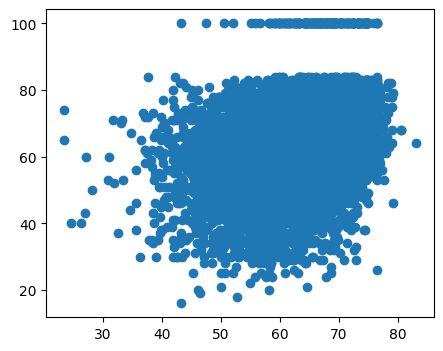

In [53]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_MATEMATICAS'])
# plt.plot(tabla_regresion1["t_ges"], pred_lineal, linestyle='-', color = "red")
plt.show()

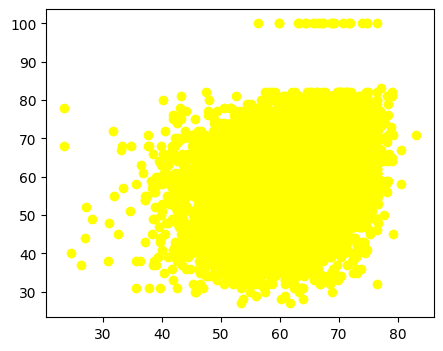

In [51]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_C_NATURALES'], c = "yellow")
plt.show()

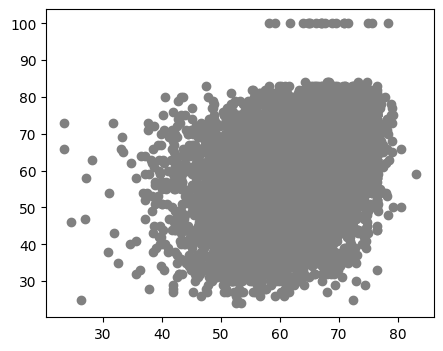

In [50]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], c = "gray")
plt.show()

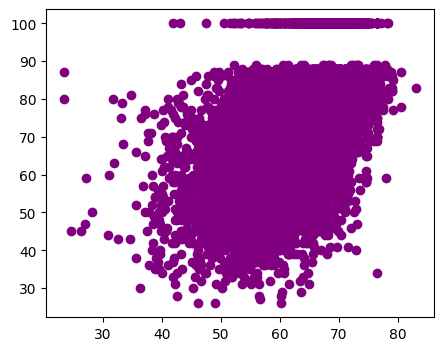

In [49]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_INGLES'], c = "purple")
plt.show()

In [54]:
X = tabla_regresion1.drop('ESTU_INSE_INDIVIDUAL', axis = 1)
Y = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)


,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3113,58,66,65,61,75.0
7298,73,60,61,64,74.0
5894,71,76,62,59,78.0
7117,100,74,74,75,80.0


In [55]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)


In [56]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.29596743300709427

In [58]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,100,83,77,77,87.0
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0


In [63]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [64]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
max_iter = 500,
activation = 'relu',
solver = 'adam',
learning_rate = 'invscaling')

In [65]:
X1 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3113,58,66,65,61,75.0
7298,73,60,61,64,74.0
5894,71,76,62,59,78.0
7117,100,74,74,75,80.0


In [66]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.29596743300709427

In [67]:
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y2 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.29596743300709427

In [68]:
X3 = tabla_regresion1[['PUNT_INGLES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA',]]
Y3 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.29596743300709427

In [69]:
XY, Z = tabla_regresion1[['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA']], tabla_regresion1['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)


,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA
3113,66,58
7298,60,73
5894,76,71
7117,74,100


In [70]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ)

LinearRegression()

In [71]:
modelo1.score(testXY, testZ)

0.1544749848047443

In [72]:
array = modelo1.coef_
array

array([0.16469969, 0.13464597])

<Axes: >

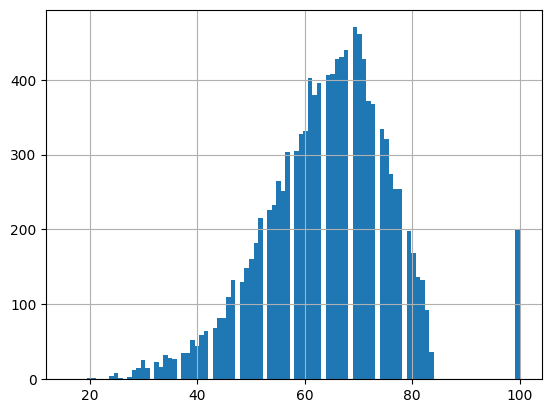

In [73]:
tabla_regresion1['PUNT_MATEMATICAS'].hist(bins = 100)

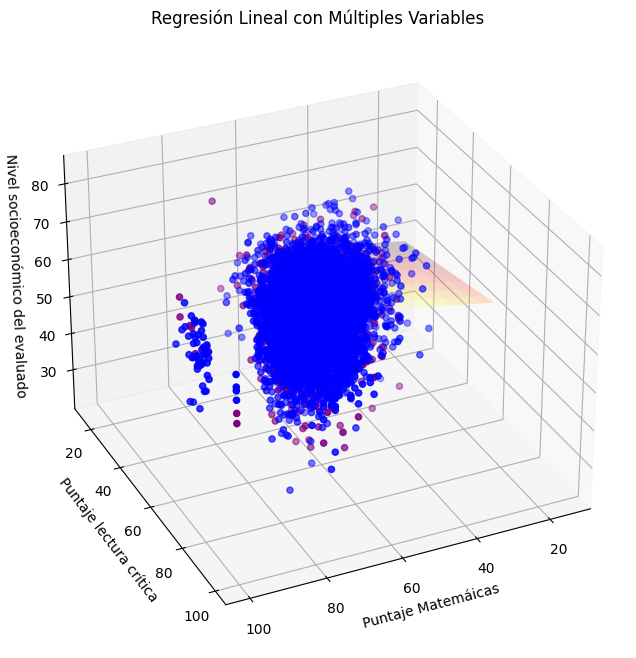

In [77]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY['PUNT_LECTURA_CRITICA'], trainXY['PUNT_MATEMATICAS'], trainZ, c='blue',s=20)
ax.scatter(testXY['PUNT_LECTURA_CRITICA'], testXY['PUNT_MATEMATICAS'], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Puntaje Matemáicas')
ax.set_ylabel('Puntaje lectura crítica')
ax.set_zlabel('Nivel socioeconómico del evaluado')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [78]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10,10,10, 10, 10, 10),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [79]:
mlp_reg.score(testX, testY)

0.27132686043027276

In [87]:
X.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,100,83,77,77,87.0
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0
7,57,68,74,61,52.0


In [89]:
no_obs = np.array([[120, 120, 120, 120, 120]])
print('Se espera que el estudiante obtenga', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el estudiante obtenga [75.19721155] bajo el perceptrón multicapa y  [76.8932539] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
pearson_corr = np.corrcoef(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.37666512872808017, 0.39393544035017275 y 0.2710503110002687.


In [92]:
pearson_corr = np.corrcoef(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.354778311549577, 0.3575861775493282 y 0.24636724048204137.


In [93]:
pearson_corr = np.corrcoef(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3598554924882554, 0.36474626881201705 y 0.2505193571669217.


In [94]:
pearson_corr = np.corrcoef(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3572658294214808, 0.36242984564624287 y 0.24884271638677483.


In [95]:
pearson_corr = np.corrcoef(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
kendall_corr, _ = kendalltau(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")


Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5511549003261873, 0.565737484040732 y 0.39578544802151444.


In [99]:
tabla_regresion2 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL'] < 120) & (tabla_regresion['PUNT_LECTURA_CRITICA'] < 120) &  (tabla_regresion['PUNT_MATEMATICAS'] < 120) &
                                   (tabla_regresion['PUNT_C_NATURALES'] < 120) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS'] < 120) & (tabla_regresion['PUNT_INGLES'] < 120)]
tabla_regresion2.head(10)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0
8,51.019087,60,70,69,63,73.0
9,52.959293,71,70,64,64,63.0
10,56.890296,71,78,71,69,74.0
11,71.737309,58,61,54,43,63.0


In [100]:
X_no = tabla_regresion2.drop('ESTU_INSE_INDIVIDUAL', axis = 1)
mlp_reg.predict(X_no)

array([65.38546055, 56.21361984, 61.2029662 , ..., 62.60718118,
       64.34016326, 60.15252537])

In [101]:
tabla_regresion2['ESTU_INSE_INDIVIDUAL'] = mlp_reg.predict(X_no)
tabla_regresion2

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,65.385461,100,83,77,77,87.0
3,56.213620,45,41,41,27,58.0
4,61.202966,53,55,41,56,69.0
5,56.005772,63,38,60,59,45.0
6,55.861804,69,60,59,51,50.0
...,...,...,...,...,...,...
12698,65.818756,74,76,71,72,87.0
12699,56.797867,69,58,59,59,57.0
12700,62.607181,64,65,67,65,77.0
12702,64.340163,70,70,63,62,82.0


In [115]:
import io
import pandas as pd
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')
bites = io.BytesIO(uploaded['SB11_20231.TXT'])
datos_icfes = pd.read_csv(bites, sep = "¬", index_col=0, encoding="latin-1")
datos_icfes.head(4)
print(datos_icfes.columns)


<ipython-input-115-68aadb2e6f56>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')
<ipython-input-115-68aadb2e6f56>:5: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(bites, sep = "¬", index_col=0, encoding="latin-1")


Index(['ESTU_NACIONALIDADÂ', 'ESTU_GENEROÂ', 'ESTU_FECHANACIMIENTOÂ',
       'PERIODOÂ', 'ESTU_CONSECUTIVOÂ', 'ESTU_ESTUDIANTEÂ',
       'ESTU_PAIS_RESIDEÂ', 'ESTU_DEPTO_RESIDEÂ', 'ESTU_COD_RESIDE_DEPTOÂ',
       'ESTU_MCPIO_RESIDEÂ', 'ESTU_COD_RESIDE_MCPIOÂ',
       'ESTU_PRESENTACIONSABADOÂ', 'FAMI_ESTRATOVIVIENDAÂ',
       'FAMI_PERSONASHOGARÂ', 'FAMI_CUARTOSHOGARÂ', 'FAMI_EDUCACIONPADREÂ',
       'FAMI_EDUCACIONMADREÂ', 'FAMI_TRABAJOLABORPADREÂ',
       'FAMI_TRABAJOLABORMADREÂ', 'FAMI_TIENEINTERNETÂ',
       'FAMI_TIENESERVICIOTVÂ', 'FAMI_TIENECOMPUTADORÂ', 'FAMI_TIENELAVADORAÂ',
       'FAMI_TIENEHORNOMICROOGASÂ', 'FAMI_TIENEAUTOMOVILÂ',
       'FAMI_TIENEMOTOCICLETAÂ', 'FAMI_TIENECONSOLAVIDEOJUEGOSÂ',
       'FAMI_NUMLIBROSÂ', 'FAMI_COMELECHEDERIVADOSÂ',
       'FAMI_COMECARNEPESCADOHUEVOÂ', 'FAMI_COMECEREALFRUTOSLEGUMBREÂ',
       'FAMI_SITUACIONECONOMICAÂ', 'ESTU_DEDICACIONLECTURADIARIAÂ',
       'ESTU_DEDICACIONINTERNETÂ', 'ESTU_HORASSEMANATRABAJAÂ',
       'ESTU_TIPOREMUNERA

In [124]:
bites = io.BytesIO(uploaded['SB11_20231.TXT'])
datos_icfes = pd.read_csv(bites, sep = "¬", index_col=0, encoding="latin-1")
datos_icfes.head(4)

<ipython-input-124-65d67d87b8a4>:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(bites, sep = "¬", index_col=0, encoding="latin-1")


,ESTU_NACIONALIDADÂ,ESTU_GENEROÂ,ESTU_FECHANACIMIENTOÂ,PERIODOÂ,ESTU_CONSECUTIVOÂ,ESTU_ESTUDIANTEÂ,ESTU_PAIS_RESIDEÂ,ESTU_DEPTO_RESIDEÂ,ESTU_COD_RESIDE_DEPTOÂ,ESTU_MCPIO_RESIDEÂ,...,PUNT_INGLESÂ,PERCENTIL_INGLESÂ,DESEMP_INGLESÂ,PUNT_GLOBALÂ,PERCENTIL_GLOBALÂ,ESTU_INSE_INDIVIDUALÂ,ESTU_NSE_INDIVIDUALÂ,ESTU_NSE_ESTABLECIMIENTOÂ,PERCENTIL_ESPECIAL_GLOBALÂ,ESTU_ESTADOINVESTIGACION
ESTU_TIPODOCUMENTOÂ,,,,,,,,,,,,,,,,,,,,,
TIÂ,COLOMBIAÂ,FÂ,04/11/2005Â,20231Â,SB11202310019049Â,ESTUDIANTEÂ,COLOMBIAÂ,CUNDINAMARCAÂ,25Â,CHÃAÂ,...,87Â,94Â,B+Â,422Â,100Â,67.5328144920732Â,4Â,4Â,100Â,PUBLICAR
TIÂ,COLOMBIAÂ,MÂ,08/04/2007Â,20231Â,SB11202310017318Â,ESTUDIANTEÂ,COLOMBIAÂ,VALLEÂ,76Â,CALIÂ,...,Â,Â,Â,326Â,Â,47.2239721156478Â,2Â,3Â,100Â,PUBLICAR
TIÂ,COLOMBIAÂ,FÂ,26/05/2006Â,20231Â,SB11202310030916Â,ESTUDIANTEÂ,COLOMBIAÂ,VALLEÂ,76Â,YOTOCOÂ,...,Â,Â,Â,186Â,Â,67.6955192709169Â,4Â,3Â,40Â,PUBLICAR
CCÂ,COLOMBIAÂ,FÂ,24/05/2004Â,20231Â,SB11202310074169Â,ESTUDIANTEÂ,COLOMBIAÂ,VALLEÂ,76Â,CALIÂ,...,58Â,43Â,A2Â,200Â,12Â,41.8631630741561Â,2Â,3Â,58Â,PUBLICAR


In [125]:
icfes_connan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
(~datos_icfes['PUNT_MATEMATICAS'].isna()) &
(~datos_icfes['PUNT_C_NATURALES'].isna()) &
(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
(~datos_icfes['PUNT_INGLES'].isna())]

KeyError: 'ESTU_INSE_INDIVIDUAL'